In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import copy


# add the directory where fixed_income_derivatives.py is located to the system path
sys.path.append(os.path.abspath("../Files"))

# import own module
import fixed_income_derivatives_E2024 as fid

%load_ext autoreload
%autoreload 2

## Problem 2

---

## Problem 3

### (a) 

In [2]:
r0, a, b, sigma = 0.04, 2, 0.05, 0.1
N_ci_plot, T = 1000, 10
size_ci = 0.95
mesh_plot = T/N_ci_plot

### (b)

In [3]:
T_ci_plot = np.array([i*mesh_plot for i in range(1,N_ci_plot+1)])
lb, ub = fid.ci_cir(r0, a, b, sigma, T_ci_plot, size_ci, type_ci='two_sided')
lb_sd, ub_sd = fid.ci_cir(r0,a,b,sigma,np.inf,size_ci,type_ci='two_sided')

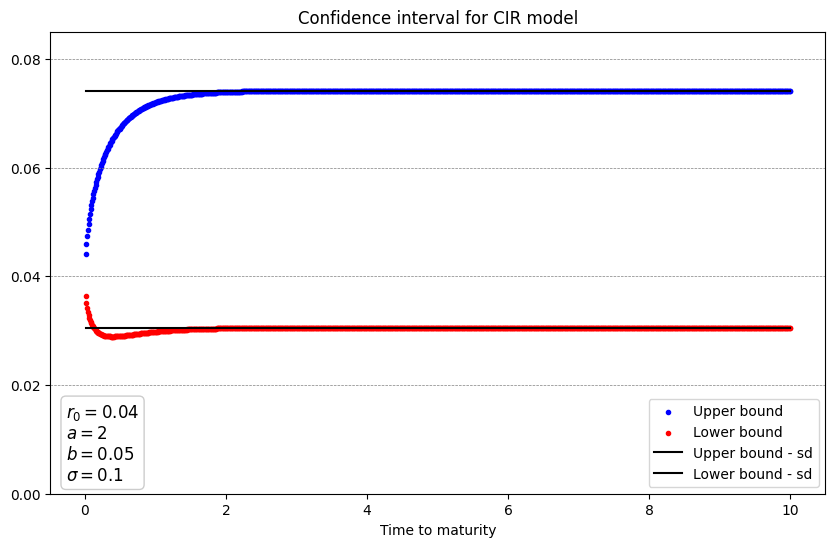

In [33]:
# plot lb and ub and confidence interval
plt.figure(figsize=(10, 6))
plt.scatter(T_ci_plot, ub, label='Upper bound', color='blue', marker='.')
plt.scatter(T_ci_plot, lb, label='Lower bound', color='red', marker='.')
plt.plot(T_ci_plot, ub_sd * np.ones(N_ci_plot), label='Upper bound - sd', color='black')
plt.plot(T_ci_plot, lb_sd * np.ones(N_ci_plot), label='Lower bound - sd', color='black')
plt.xlabel('Time to maturity')
plt.title('Confidence interval for CIR model')
plt.legend(loc='lower right')

# Set y-axis to start at 0
plt.ylim(bottom=0, top=0.085)


# Add horizontal lines at each tick mark
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(0.02))
for tick in ax.get_yticks():
    ax.axhline(y=tick, color='gray', linestyle='--', linewidth=0.5)

textstr = f'$r_0={r0}$\n$a={a}$\n$b={b}$\n$\\sigma={sigma}$'
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
plt.text(0.02, 0.02, textstr, transform=ax.transAxes, fontsize=12,
         verticalalignment='bottom', bbox=props)

plt.show()
plt.close()

### (c)

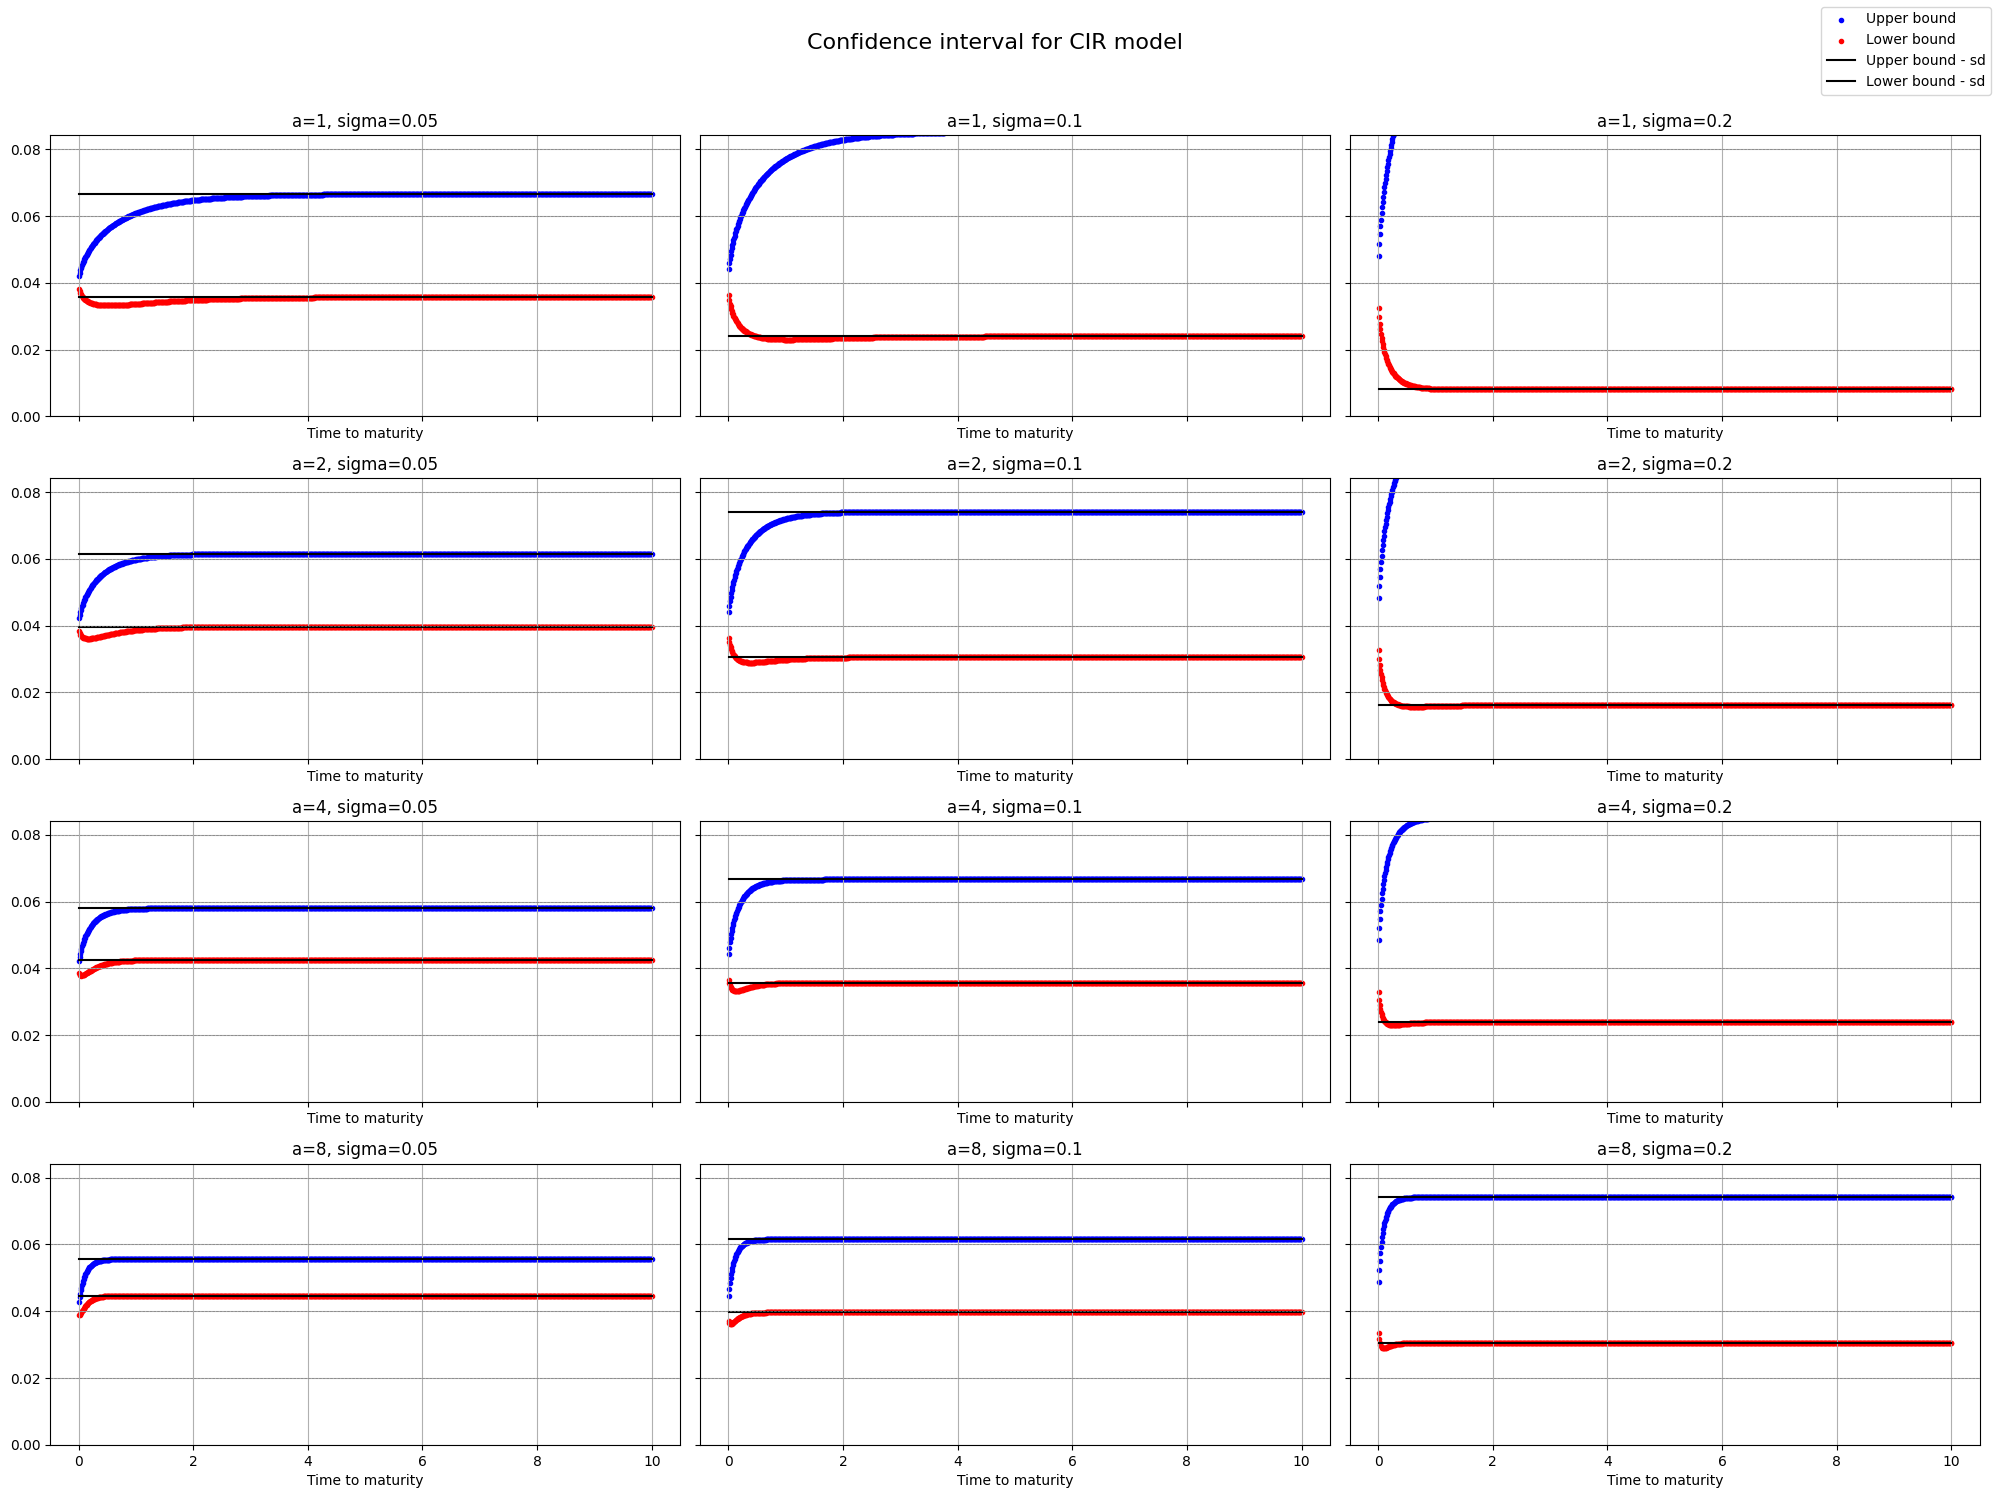

In [5]:
a_range = [1, 2, 4, 8]
sigma_range = [0.05, 0.1, 0.2]

dim_a, dim_sigma = len(a_range), len(sigma_range)

fig, axes = plt.subplots(dim_a, dim_sigma, figsize=(20, 15), sharex=True, sharey=True)
axes = axes.flatten()

loop = 0
for a_i in a_range:
    for sigma_i in sigma_range:
        lb_i, ub_i = fid.ci_cir(r0, a_i, b, sigma_i, T_ci_plot, size_ci, type_ci='two_sided')
        lb_sd_i, ub_sd_i = fid.ci_cir(r0, a_i, b, sigma_i, np.inf, size_ci, type_ci='two_sided')

        ax = axes[loop]
        ax.scatter(T_ci_plot, ub_i, label='Upper bound', color='blue', marker='.')
        ax.scatter(T_ci_plot, lb_i, label='Lower bound', color='red', marker='.')
        ax.plot(T_ci_plot, ub_sd_i * np.ones(len(T_ci_plot)), label='Upper bound - sd', color='black')
        ax.plot(T_ci_plot, lb_sd_i * np.ones(len(T_ci_plot)), label='Lower bound - sd', color='black')
        ax.set_xlabel('Time to maturity')
        ax.set_title(f'a={a_i}, sigma={sigma_i}')
        ax.grid(True)

        # Set y-axis to start at 0 and dynamically set the upper limit
        ax.set_ylim(bottom=0, top=ub_sd_i + 0.01)

        # Adjust y-axis ticks to be every 0.02
        ax.yaxis.set_major_locator(MultipleLocator(0.02))

        # Add horizontal lines at each tick mark
        for tick in ax.get_yticks():
            ax.axhline(y=tick, color='gray', linestyle='--', linewidth=0.5)

        loop += 1

# Add a single legend for all subplots
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

# Add a single title for the entire figure
fig.suptitle('Confidence interval for CIR model', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
plt.close()

### (e)

In [45]:
np.random.seed(2024)
T_2e, M = 10, 10000
delta = T_2e/M
T_simul = np.array([i*delta for i in range(0,M+1)])
r_euler = fid.simul_cir(r0, a, b, sigma, M, T_2e, method='euler')
r_milstein = fid.simul_cir(r0, a, b, sigma, M, T_2e, method='milstein')
r_exact = fid.simul_cir(r0, a, b, sigma, M, T_2e, method='exact')
lb_simul, ub_simul = fid.ci_cir(r0, a, b, sigma, T_simul, size_ci, type_ci='two_sided')

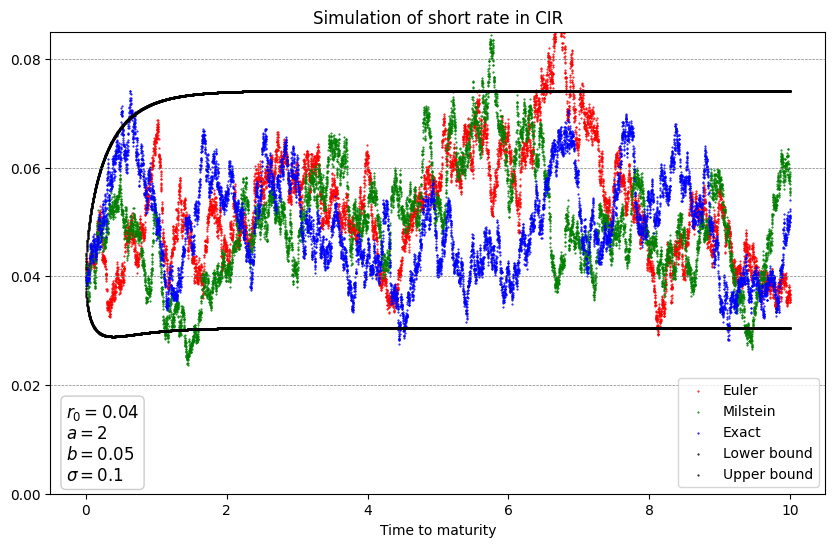

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(T_simul, r_euler, label='Euler', color='red', marker='.', s=1)
plt.scatter(T_simul, r_milstein, label='Milstein', color='green', marker='.', s=1)
plt.scatter(T_simul, r_exact, label='Exact', color='blue', marker='.', s=1)
plt.scatter(T_simul, lb_simul, label='Lower bound', color='black', marker='.', s=1)
plt.scatter(T_simul, ub_simul, label='Upper bound', color='black', marker='.', s=1)

plt.xlabel('Time to maturity')
plt.title('Simulation of short rate in CIR')
plt.ylim(bottom=0, top=0.085)

# Add horizontal lines at each tick mark
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(0.02))
for tick in ax.get_yticks():
    ax.axhline(y=tick, color='gray', linestyle='--', linewidth=0.5)

plt.legend(loc='lower right')

textstr = f'$r_0={r0}$\n$a={a}$\n$b={b}$\n$\\sigma={sigma}$'
props = dict(boxstyle='round', facecolor='white', alpha=0.2)
plt.text(0.02, 0.02, textstr, transform=ax.transAxes, fontsize=12,
         verticalalignment='bottom', bbox=props)

plt.show()